# TP - Les Embeddings en G√©opolitique : Comment les IA con√ßoivent le monde

## Dur√©e : 1h30-2h

### Objectifs p√©dagogiques
- Comprendre le concept d'embedding et son importance dans les mod√®les d'IA
- Explorer comment diff√©rents mod√®les (am√©ricains, chinois, fran√ßais) repr√©sentent les pays et concepts g√©opolitiques
- Analyser les biais potentiels dans les repr√©sentations vectorielles
- D√©velopper un esprit critique sur l'usage de l'IA en g√©opolitique

### Pr√©requis
- Connaissances de base en Python
- Notions de prompting et context windows (TP pr√©c√©dent)
- Curiosit√© g√©opolitique !

## 1. Introduction aux Embeddings

### Qu'est-ce qu'un embedding ?

Un **embedding** est une repr√©sentation vectorielle d'un mot, d'une phrase ou d'un concept. C'est une fa√ßon de transformer du texte en nombres que les mod√®les d'IA peuvent comprendre et manipuler.

**Exemple simple** : 
- "France" ‚Üí [0.2, -0.5, 0.8, ...] (vecteur de N dimensions)
- "Allemagne" ‚Üí [0.3, -0.4, 0.7, ...]

### Pourquoi c'est important ?

Les embeddings capturent les **relations s√©mantiques** :
- Des pays proches g√©ographiquement peuvent avoir des embeddings similaires
- Des pays avec des syst√®mes politiques similaires peuvent √™tre proches dans l'espace vectoriel
- **MAIS** : ces similarit√©s refl√®tent les donn√©es d'entra√Ænement du mod√®le !

## 2. Installation et configuration

Commen√ßons par installer les biblioth√®ques n√©cessaires.

In [ ]:
# Installation des packages n√©cessaires
!pip install sentence-transformers numpy pandas matplotlib seaborn scikit-learn plotly
!pip install openai anthropic  # Pour acc√©der √† diff√©rents mod√®les

In [3]:
# Imports essentiels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 3. Choix des mod√®les d'embeddings

Nous allons utiliser plusieurs mod√®les pour comparer leurs repr√©sentations du monde :

In [4]:
# Dictionnaire des mod√®les disponibles
MODELS = {
    "multilingual": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    "english": "sentence-transformers/all-MiniLM-L6-v2",
    "french": "dangvantuan/sentence-camembert-base",
    # Note: Pour des mod√®les chinois comme DeepSeek, il faudrait une API sp√©cifique
}

# Chargement d'un mod√®le par d√©faut
model_name = "multilingual"
model = SentenceTransformer(MODELS[model_name])
print(f"Mod√®le charg√© : {model_name}")

Mod√®le charg√© : multilingual


## 4. D√©finition des pays et sujets √† analyser

In [5]:
# Liste de pays pour notre analyse
PAYS = [
    "France", "Allemagne", "√âtats-Unis", "Chine", "Russie", 
    "Japon", "Br√©sil", "Inde", "Royaume-Uni", "Canada",
    "Iran", "Isra√´l", "Arabie Saoudite", "Turquie", "Mexique",
    "Australie", "Cor√©e du Sud", "Cor√©e du Nord", "Ukraine", "Pologne",
    "Afrique du Sud", "Nigeria", "√âgypte", "Argentine", "Su√®de"
]

# Sujets g√©opolitiques √† explorer
SUJETS = {
    "neutre": "",  # Embedding du pays seul
    "d√©mocratie": "d√©mocratie et libert√©s",
    "droits_homme": "respect des droits de l'homme",
    "egalite_hf": "√©galit√© homme-femme",
    "economie": "puissance √©conomique",
    "militaire": "puissance militaire",
    "technologie": "innovation technologique",
    "environnement": "protection de l'environnement",
    "ia": "d√©veloppement de l'intelligence artificielle",
    "histoire": "importance historique",
    "constitution": "stabilit√© constitutionnelle",
    "croissance": "perspective de croissance √©conomique"
}

## 5. Fonctions principales pour l'analyse

In [6]:
def obtenir_embeddings(pays_liste, sujet="", model=model):
    """
    G√©n√®re les embeddings pour une liste de pays selon un sujet donn√©.
    """
    if sujet:
        textes = [f"{pays} {sujet}" for pays in pays_liste]
    else:
        textes = pays_liste
    
    embeddings = model.encode(textes)
    return embeddings

def calculer_similarites(embeddings, pays_liste):
    """
    Calcule la matrice de similarit√© cosinus entre les embeddings.
    """
    similarities = cosine_similarity(embeddings)
    df_sim = pd.DataFrame(similarities, index=pays_liste, columns=pays_liste)
    return df_sim

def reduire_dimensions(embeddings, method='pca'):
    """
    R√©duit les embeddings √† 2 dimensions pour la visualisation.
    """
    if method == 'pca':
        reducer = PCA(n_components=2, random_state=42)
    else:  # tsne
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1))
    
    coords_2d = reducer.fit_transform(embeddings)
    return coords_2d

## 6. Visualisation des embeddings

In [7]:
def visualiser_carte_2d(embeddings, pays_liste, sujet="neutre", method='pca'):
    """
    Cr√©e une visualisation 2D interactive des embeddings.
    """
    coords_2d = reduire_dimensions(embeddings, method)
    
    df_viz = pd.DataFrame({
        'Pays': pays_liste,
        'X': coords_2d[:, 0],
        'Y': coords_2d[:, 1]
    })
    
    fig = px.scatter(df_viz, x='X', y='Y', text='Pays',
                     title=f"Carte des embeddings - Sujet: {sujet} - M√©thode: {method.upper()}",
                     width=800, height=600)
    
    fig.update_traces(textposition='top center', marker=dict(size=10))
    fig.update_layout(showlegend=False)
    
    return fig

def visualiser_heatmap(df_similarites, titre="Similarit√©s entre pays"):
    """
    Cr√©e une heatmap des similarit√©s.
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_similarites, annot=False, cmap='RdBu_r', center=0.5,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(titre)
    plt.tight_layout()
    plt.show()

## 7. Analyse comparative : Explorons les repr√©sentations

### Exercice 1 : Repr√©sentation neutre des pays

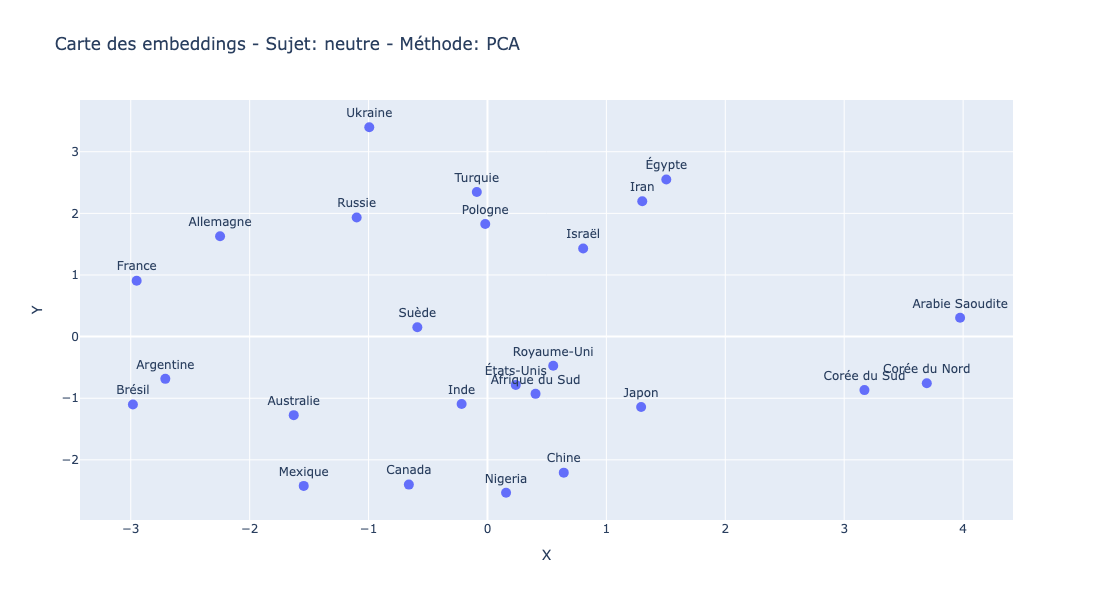


Les 5 paires de pays les plus similaires (repr√©sentation neutre):
Cor√©e du Sud - Cor√©e du Nord: 0.908
Ukraine - Pologne: 0.686
Pologne - Su√®de: 0.674
Allemagne - Ukraine: 0.669
Arabie Saoudite - Cor√©e du Nord: 0.661


In [8]:
# Obtenir les embeddings neutres (sans sujet sp√©cifique)
embeddings_neutre = obtenir_embeddings(PAYS, sujet="")
sim_neutre = calculer_similarites(embeddings_neutre, PAYS)

# Visualisation 2D
fig = visualiser_carte_2d(embeddings_neutre, PAYS, sujet="neutre")
fig.show()

# Les 5 paires de pays les plus similaires
print("\nLes 5 paires de pays les plus similaires (repr√©sentation neutre):")
sim_values = []
for i in range(len(PAYS)):
    for j in range(i+1, len(PAYS)):
        sim_values.append((PAYS[i], PAYS[j], sim_neutre.iloc[i, j]))
sim_values.sort(key=lambda x: x[2], reverse=True)
for pays1, pays2, sim in sim_values[:5]:
    print(f"{pays1} - {pays2}: {sim:.3f}")

### ü§î Question 1 : 
Observez la carte 2D ci-dessus. Quels regroupements de pays remarquez-vous ? Ces regroupements correspondent-ils √† des r√©alit√©s g√©opolitiques (proximit√© g√©ographique, alliances, syst√®mes politiques similaires) ?

### Exercice 2 : Impact du sujet sur les repr√©sentations

In [10]:
# Fonction pour analyser un sujet sp√©cifique
def analyser_sujet(sujet_key, pays_liste=PAYS):
    sujet_texte = SUJETS[sujet_key]
    print(f"\n=== Analyse pour le sujet: {sujet_key} - '{sujet_texte}' ===")
    
    # Obtenir les embeddings
    embeddings = obtenir_embeddings(pays_liste, sujet=sujet_texte)
    
    # Visualisation
    fig = visualiser_carte_2d(embeddings, pays_liste, sujet=sujet_key)
    fig.show()
    
    # Top 5 des pays les plus similaires √† la France
    sim_matrix = calculer_similarites(embeddings, pays_liste)
    if "France" in pays_liste:
        france_idx = pays_liste.index("France")
        france_sims = [(pays, sim_matrix.iloc[france_idx, i]) 
                       for i, pays in enumerate(pays_liste) if pays != "France"]
        france_sims.sort(key=lambda x: x[1], reverse=True)
        
        print("\nTop 5 des pays les plus similaires √† la France:")
        for pays, sim in france_sims[:5]:
            print(f"  {pays}: {sim:.3f}")
    
    return embeddings, sim_matrix


=== Analyse pour le sujet: d√©mocratie - 'd√©mocratie et libert√©s' ===


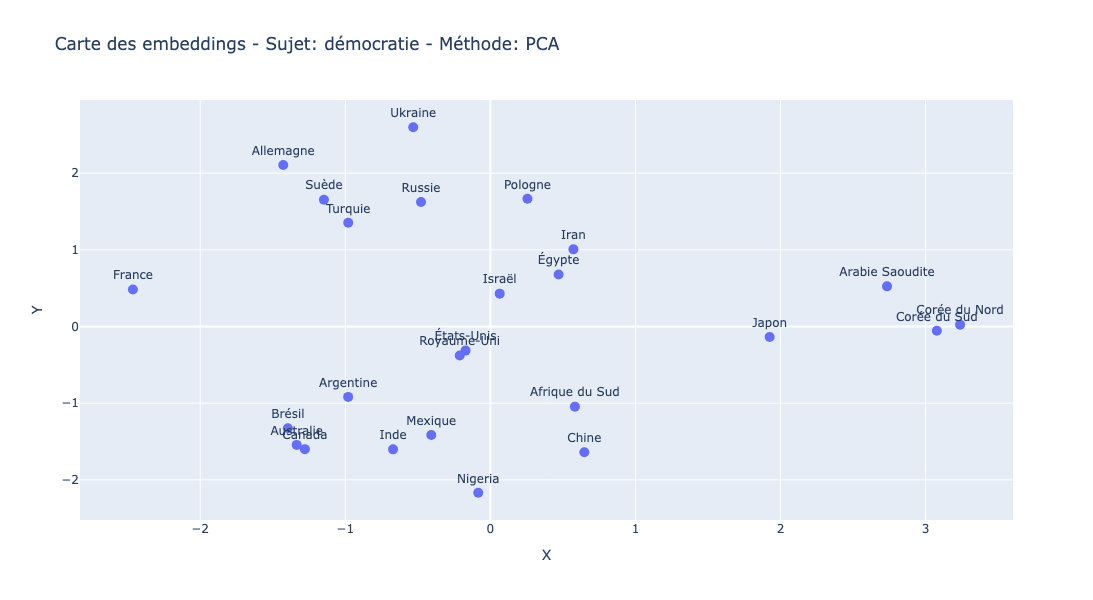


Top 5 des pays les plus similaires √† la France:
  Allemagne: 0.695
  Royaume-Uni: 0.651
  √âtats-Unis: 0.630
  Su√®de: 0.626
  Pologne: 0.616


In [11]:
# Analysons le sujet "d√©mocratie"
emb_demo, sim_demo = analyser_sujet("d√©mocratie")


=== Analyse pour le sujet: droits_homme - 'respect des droits de l'homme' ===


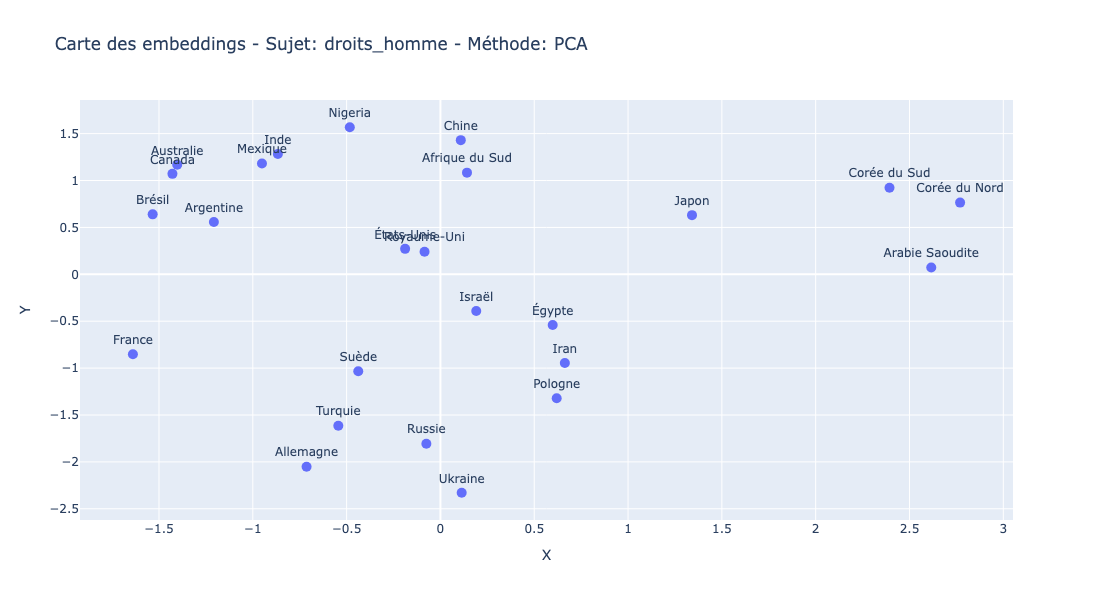


Top 5 des pays les plus similaires √† la France:
  Allemagne: 0.711
  Royaume-Uni: 0.705
  Su√®de: 0.704
  Pologne: 0.670
  Ukraine: 0.635


In [12]:
# Analysons le sujet "droits de l'homme"
emb_droits, sim_droits = analyser_sujet("droits_homme")

### ü§î Question 2 : 
Comparez les cartes pour "d√©mocratie" et "droits de l'homme". Les regroupements sont-ils diff√©rents ? Certains pays changent-ils significativement de position ? Qu'est-ce que cela nous dit sur la fa√ßon dont le mod√®le associe ces concepts aux diff√©rents pays ?

### Exercice 3 : Comparaison entre mod√®les

Comparons maintenant comment diff√©rents mod√®les repr√©sentent les m√™mes concepts.

In [13]:
def comparer_modeles(sujet_key, pays_liste=PAYS[:10]):  # Limit√© √† 10 pays pour la lisibilit√©
    """
    Compare les embeddings de diff√©rents mod√®les pour un m√™me sujet.
    """
    resultats = {}
    sujet_texte = SUJETS[sujet_key]
    
    fig, axes = plt.subplots(1, len(MODELS), figsize=(5*len(MODELS), 5))
    if len(MODELS) == 1:
        axes = [axes]
    
    for idx, (model_name, model_path) in enumerate(MODELS.items()):
        try:
            # Charger le mod√®le
            model = SentenceTransformer(model_path)
            
            # Obtenir les embeddings
            embeddings = obtenir_embeddings(pays_liste, sujet=sujet_texte, model=model)
            
            # R√©duction en 2D
            coords_2d = reduire_dimensions(embeddings, 'pca')
            
            # Visualisation
            ax = axes[idx]
            for i, pays in enumerate(pays_liste):
                ax.scatter(coords_2d[i, 0], coords_2d[i, 1])
                ax.annotate(pays, (coords_2d[i, 0], coords_2d[i, 1]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
            
            ax.set_title(f"Mod√®le: {model_name}")
            ax.grid(True, alpha=0.3)
            
            resultats[model_name] = {
                'embeddings': embeddings,
                'coords_2d': coords_2d
            }
            
        except Exception as e:
            print(f"Erreur avec le mod√®le {model_name}: {e}")
            ax.text(0.5, 0.5, f"Erreur\n{model_name}", 
                   ha='center', va='center', transform=ax.transAxes)
    
    plt.suptitle(f"Comparaison des mod√®les - Sujet: {sujet_key}")
    plt.tight_layout()
    plt.show()
    
    return resultats

Erreur avec le mod√®le multilingual: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2/tree/main/additional_chat_templates?recursive=False&expand=False (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x17af28550>: Failed to resolve \'huggingface.co\' ([Errno 8] nodename nor servname provided, or not known)"))'), '(Request ID: 8c6e7c18-b715-4a07-b2d1-addde7c44295)')


UnboundLocalError: cannot access local variable 'ax' where it is not associated with a value

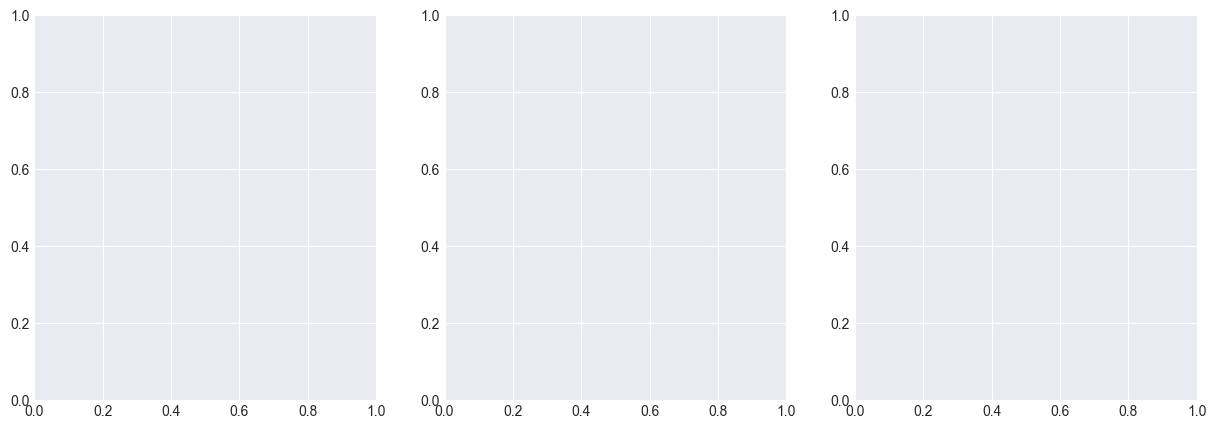

In [14]:
# Comparaison pour le sujet "IA"
resultats_ia = comparer_modeles("ia", PAYS[:10])

### ü§î Question 3 : 
Si vous avez acc√®s √† plusieurs mod√®les, observez les diff√©rences. Le mod√®le fran√ßais positionne-t-il diff√©remment la France par rapport aux autres pays ? Les mod√®les ont-ils des biais g√©ographiques ou culturels apparents ?

### Exercice 4 : Analyse temporelle et contextuelle

Explorons comment le contexte influence les embeddings.


Analyse contextuelle pour Ukraine:
                      Contexte  Similarit√© avec base
                       Ukraine              1.000000
            Ukraine avant 2014              0.880298
     Ukraine conflit militaire              0.808818
Ukraine int√©gration europ√©enne              0.778081
   Ukraine production agricole              0.640720
 Ukraine technologie nucl√©aire              0.583280


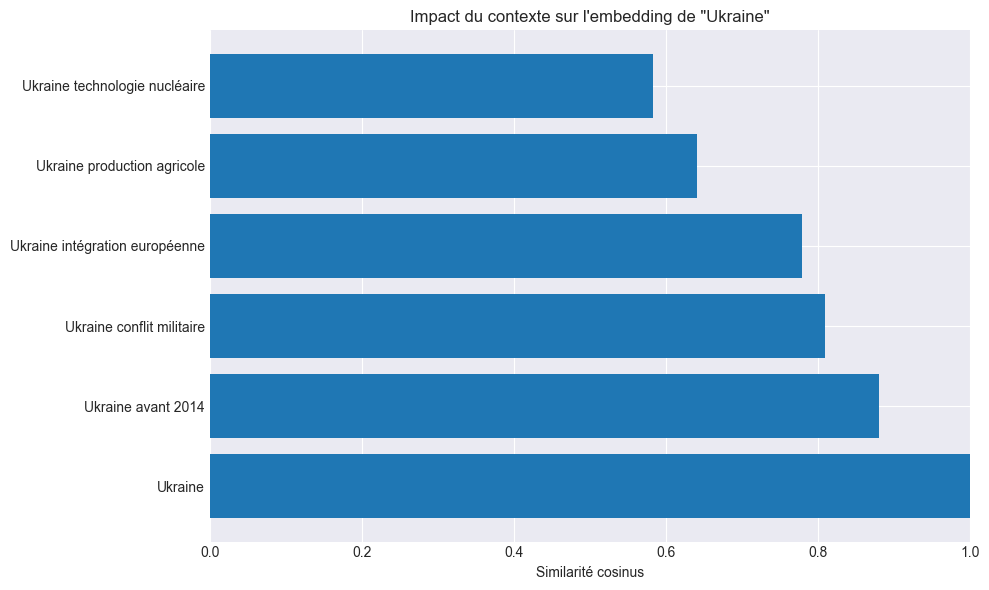

In [15]:
# Cr√©ons diff√©rents contextes pour un m√™me pays
def analyser_contextes(pays="Ukraine"):
    contextes = [
        f"{pays}",
        f"{pays} avant 2014",
        f"{pays} conflit militaire",
        f"{pays} int√©gration europ√©enne",
        f"{pays} production agricole",
        f"{pays} technologie nucl√©aire"
    ]
    
    # Obtenir les embeddings
    embeddings = model.encode(contextes)
    
    # Calculer les similarit√©s avec le premier embedding (pays seul)
    base_embedding = embeddings[0].reshape(1, -1)
    similarities = [cosine_similarity(base_embedding, emb.reshape(1, -1))[0][0] 
                   for emb in embeddings]
    
    # Affichage
    df_contextes = pd.DataFrame({
        'Contexte': contextes,
        'Similarit√© avec base': similarities
    })
    
    print(f"\nAnalyse contextuelle pour {pays}:")
    print(df_contextes.to_string(index=False))
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.barh(df_contextes['Contexte'], df_contextes['Similarit√© avec base'])
    plt.xlabel('Similarit√© cosinus')
    plt.title(f'Impact du contexte sur l\'embedding de "{pays}"')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
    
    return embeddings, df_contextes

# Analyser l'Ukraine
emb_ukraine, df_ukraine = analyser_contextes("Ukraine")


Analyse contextuelle pour Chine:
                    Contexte  Similarit√© avec base
                       Chine              1.000000
            Chine avant 2014              0.834030
     Chine conflit militaire              0.704544
Chine int√©gration europ√©enne              0.660480
   Chine production agricole              0.680586
 Chine technologie nucl√©aire              0.628287


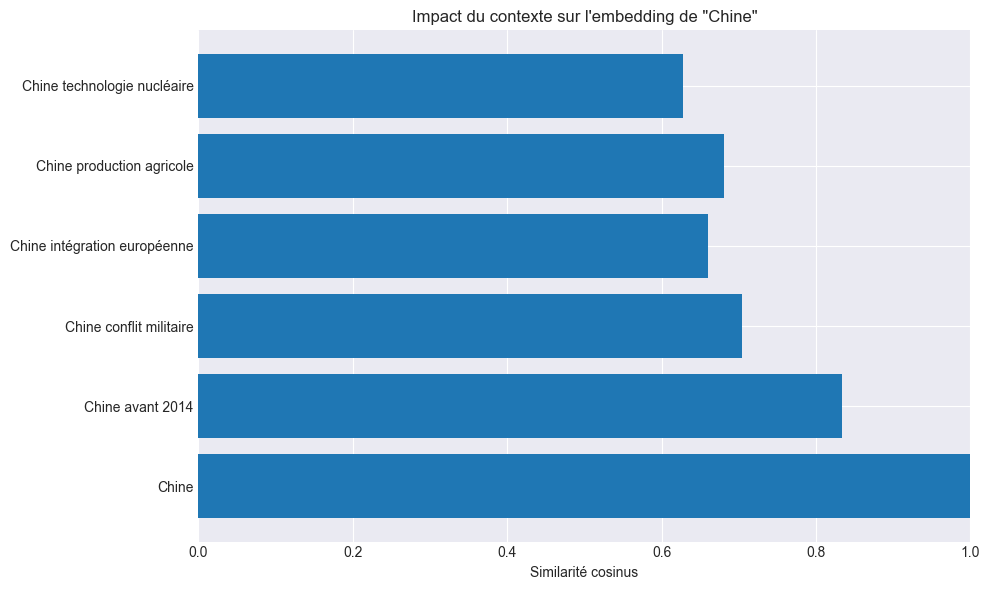

In [16]:
# Essayez avec un autre pays
# üìù TODO: Remplacez "Chine" par un autre pays de votre choix
emb_autre, df_autre = analyser_contextes("Chine")

### ü§î Question 4 : 
Comment le contexte modifie-t-il la repr√©sentation d'un pays ? Les contextes militaires/conflictuels changent-ils drastiquement l'embedding ? Qu'est-ce que cela implique pour l'analyse g√©opolitique automatis√©e ?

## 8. Exploration avanc√©e : Cr√©ez vos propres analyses

### Exercice 5 : Analyse personnalis√©e


=== Analyse pour le sujet: mon_theme - 'ind√©pendance √©nerg√©tique' ===


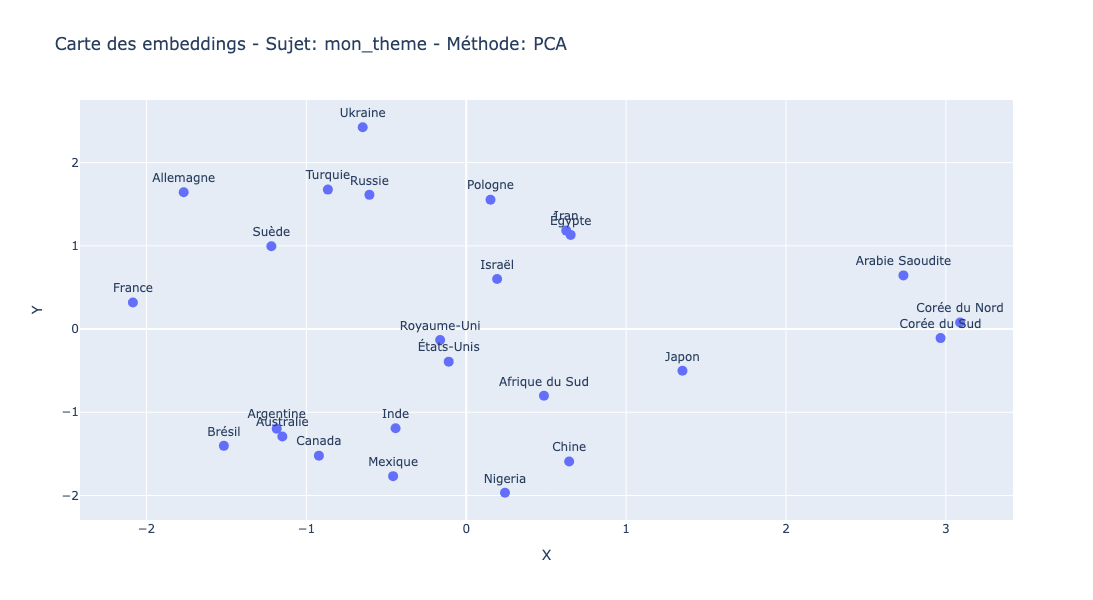


Top 5 des pays les plus similaires √† la France:
  Allemagne: 0.720
  Royaume-Uni: 0.717
  Su√®de: 0.691
  √âtats-Unis: 0.679
  Pologne: 0.655


In [17]:
# üìù TODO: Ajoutez un nouveau sujet qui vous int√©resse
MON_SUJET = {
    "mon_theme": "ind√©pendance √©nerg√©tique",  # Remplacez par votre sujet
}

# Ajoutons-le aux sujets existants
SUJETS.update(MON_SUJET)

# Analysons ce nouveau sujet
emb_custom, sim_custom = analyser_sujet("mon_theme")

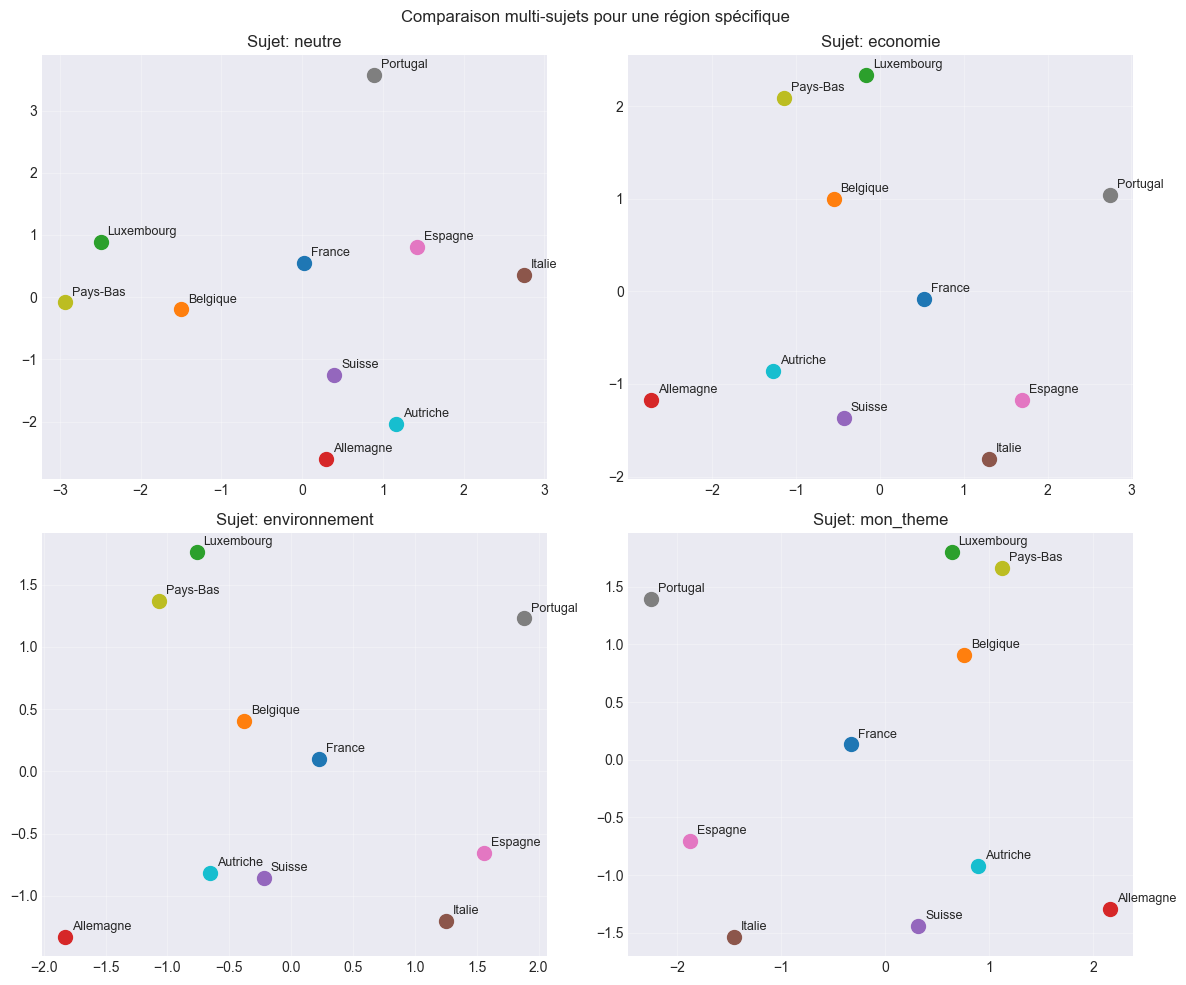

In [18]:
# üìù TODO: Cr√©ez une liste de pays sp√©cifique √† votre r√©gion d'int√©r√™t
MES_PAYS = [
    "France", "Belgique", "Luxembourg", "Allemagne", "Suisse",
    "Italie", "Espagne", "Portugal", "Pays-Bas", "Autriche"
]

# Analysons ces pays sur plusieurs sujets
sujets_a_comparer = ["neutre", "economie", "environnement", "mon_theme"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, sujet in enumerate(sujets_a_comparer):
    sujet_texte = SUJETS.get(sujet, "")
    embeddings = obtenir_embeddings(MES_PAYS, sujet=sujet_texte)
    coords_2d = reduire_dimensions(embeddings, 'pca')
    
    ax = axes[idx]
    for i, pays in enumerate(MES_PAYS):
        ax.scatter(coords_2d[i, 0], coords_2d[i, 1], s=100)
        ax.annotate(pays, (coords_2d[i, 0], coords_2d[i, 1]), 
                   xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    ax.set_title(f"Sujet: {sujet}")
    ax.grid(True, alpha=0.3)

plt.suptitle("Comparaison multi-sujets pour une r√©gion sp√©cifique")
plt.tight_layout()
plt.show()

## 9. Analyse des biais et implications

### Exercice 6 : D√©tection de biais potentiels


Analyse des biais pour le sujet: d√©mocratie


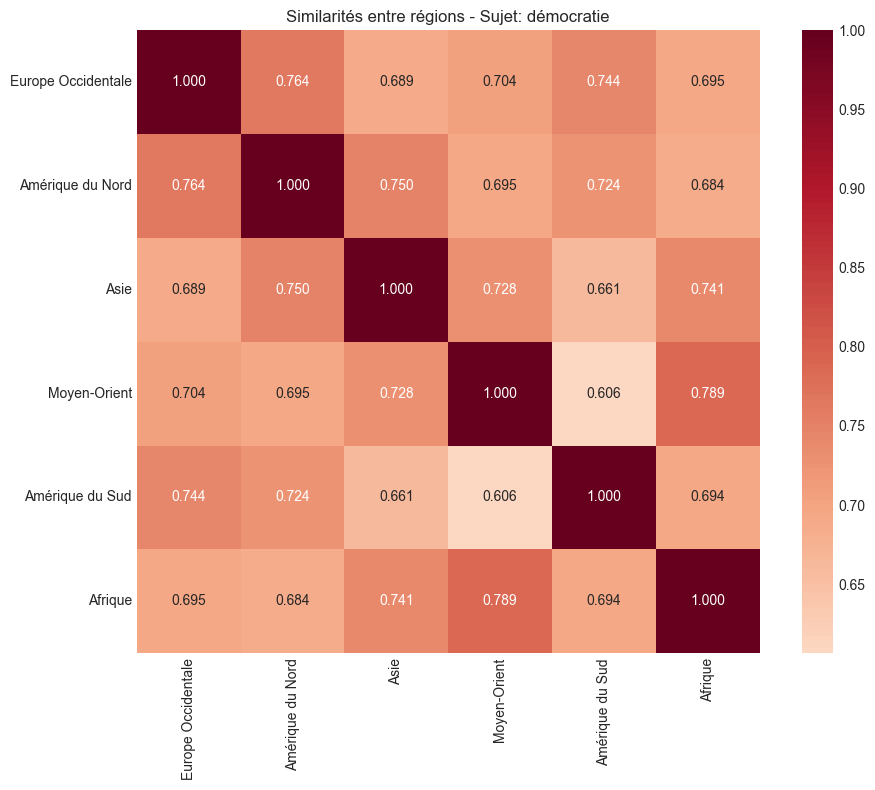


Analyse des biais pour le sujet: economie


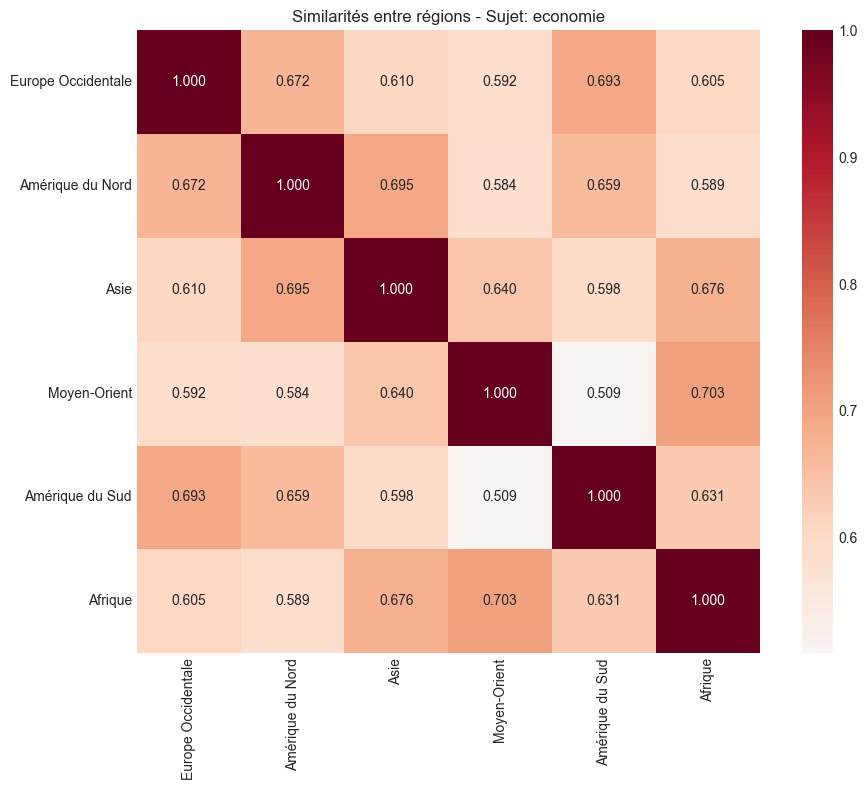

In [19]:
def detecter_biais_geographiques(sujet_key):
    """
    Analyse les potentiels biais g√©ographiques dans les embeddings.
    """
    # Groupes g√©ographiques
    groupes = {
        "Europe Occidentale": ["France", "Allemagne", "Royaume-Uni", "Espagne", "Italie"],
        "Am√©rique du Nord": ["√âtats-Unis", "Canada", "Mexique"],
        "Asie": ["Chine", "Japon", "Inde", "Cor√©e du Sud"],
        "Moyen-Orient": ["Iran", "Isra√´l", "Arabie Saoudite", "Turquie"],
        "Am√©rique du Sud": ["Br√©sil", "Argentine"],
        "Afrique": ["Afrique du Sud", "Nigeria", "√âgypte"]
    }
    
    sujet_texte = SUJETS[sujet_key]
    print(f"\nAnalyse des biais pour le sujet: {sujet_key}")
    
    # Calculer les embeddings moyens par groupe
    moyennes_groupes = {}
    for groupe, pays_groupe in groupes.items():
        embeddings = obtenir_embeddings(pays_groupe, sujet=sujet_texte)
        moyennes_groupes[groupe] = np.mean(embeddings, axis=0)
    
    # Calculer les distances inter-groupes
    distances = pd.DataFrame(index=groupes.keys(), columns=groupes.keys())
    for g1 in groupes.keys():
        for g2 in groupes.keys():
            sim = cosine_similarity([moyennes_groupes[g1]], [moyennes_groupes[g2]])[0][0]
            distances.loc[g1, g2] = sim
    
    # Visualisation
    plt.figure(figsize=(10, 8))
    sns.heatmap(distances.astype(float), annot=True, fmt='.3f', 
                cmap='RdBu_r', center=0.5, square=True)
    plt.title(f"Similarit√©s entre r√©gions - Sujet: {sujet_key}")
    plt.tight_layout()
    plt.show()
    
    return distances

# Analyser les biais pour diff√©rents sujets
dist_democratie = detecter_biais_geographiques("d√©mocratie")
dist_economie = detecter_biais_geographiques("economie")

### ü§î Question 5 : 
Observez les matrices de similarit√© ci-dessus. Y a-t-il des "blocs" g√©opolitiques qui √©mergent ? Les similarit√©s correspondent-elles aux alliances politiques actuelles ? Quels biais cela r√©v√®le-t-il dans les donn√©es d'entra√Ænement des mod√®les ?

## 10. Conclusions et r√©flexions critiques

### Synth√®se de vos observations

Prenez quelques minutes pour r√©fl√©chir et documenter vos observations :

In [20]:
# üìù TODO: Compl√©tez cette cellule avec vos observations

mes_observations = {
    "biais_observes": [
        # Ex: "Les pays occidentaux sont syst√©matiquement regroup√©s sur le th√®me d√©mocratie"
    ],
    "surprises": [
        # Ex: "La position de X change drastiquement selon le sujet"
    ],
    "implications_geopolitiques": [
        # Ex: "Ces biais pourraient influencer les analyses automatis√©es..."
    ],
    "recommandations": [
        # Ex: "Il faudrait utiliser plusieurs mod√®les pour croiser les analyses"
    ]
}

print("=== MES CONCLUSIONS ===")
for categorie, observations in mes_observations.items():
    print(f"\n{categorie.upper()}:")
    for obs in observations:
        print(f"  - {obs}")

=== MES CONCLUSIONS ===

BIAIS_OBSERVES:

SURPRISES:

IMPLICATIONS_GEOPOLITIQUES:

RECOMMANDATIONS:
